# Support Vector Machine

## Important Parameters

 - C: Is the regularization constant. Default = 1 
 - Kernel: The kernel used to compute the dot products. Default = "RBF" (Infinite Dimensional) , others: Poly (Finite), Sigmoid (Infinite), Linear (Finite)
 - Kernel parameters: Degree, Gamma/Scale, etc... 

## Relevant Information 
 - SVD are **sensitive to feature scaling**
 - Approx Complexity: $O(N \cdot M)$ linear case and $O(N^2 \cdot M)$ to $O(N^3 \cdot M)$ when using Kernel trick. $M$ number of attributes and $N$ the number of instances. 


## Implementation


We are going to work with the [Digits](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) Dataset


In [12]:
#Import usual libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap

#Import usual functions
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , accuracy_score

#Import utils
from utils.plot import confusion_matrix_custom

#Import required libraries and functions
from sklearn.datasets import load_digits, load_iris
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
#Load the dataset 
digits = load_digits()
df = pd.DataFrame(data=digits.data, columns=digits.feature_names)
df["target"] = digits.target
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [3]:
#Divide the data 
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=["target"]), df["target"], test_size=0.333, stratify = df["target"], random_state=666)

#Create the Pipeline
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(random_state=666))])

#Fit the values
pipe.fit(X_train,y_train)
#Make a prediction
y_pred = pipe.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        59
           1       0.98      0.98      0.98        61
           2       1.00      0.98      0.99        59
           3       1.00      0.95      0.97        61
           4       0.88      0.98      0.93        60
           5       0.95      1.00      0.98        61
           6       1.00      1.00      1.00        60
           7       1.00      1.00      1.00        60
           8       0.98      0.95      0.96        58
           9       0.98      0.93      0.96        60

    accuracy                           0.98       599
   macro avg       0.98      0.98      0.98       599
weighted avg       0.98      0.98      0.98       599



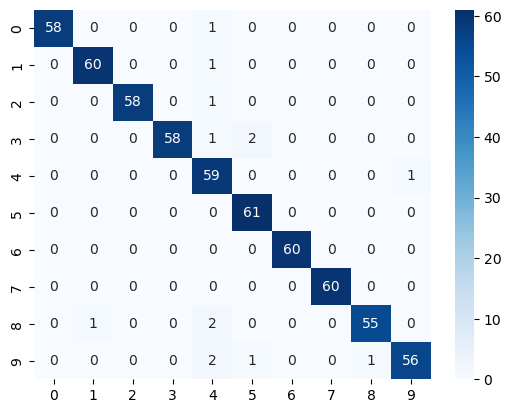

In [4]:
#Change of notation
y_real = y_test

#Showing performance with a confusion matrix
confusion_matrix_custom(y_real,y_pred)

#Showing performance with metrics
print(classification_report(y_real , y_pred))

## Kernel Choice

In [5]:
# Number of points
n = 2000

# Means
mean_A = np.array([0, 0])

# Covariance matrix
std = np.eye(2)

# Create two dimensional points
X= np.random.multivariate_normal(mean_A, std, size =n)
y = np.zeros(n)

for i in range(n):
    if X[i][0]*X[i][1] >= 0:
        y[i]=1
    else:
        y[i]= 0

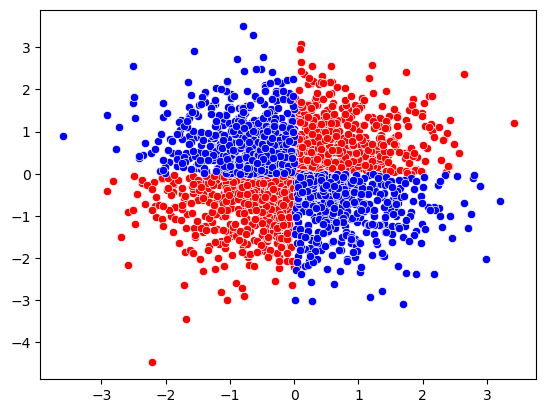

In [6]:
#Plotting
grupo1 = X[y==1]
grupo2 = X[y==0]

plt.scatter(grupo1[:,0], grupo1[:,1], c='red', edgecolor='w', linewidth=0.5)
plt.scatter(grupo2[:,0], grupo2[:,1], c='blue', edgecolor='w', linewidth=0.5)

In [37]:
#Fit the model with RBF and Poly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 666 , stratify=y)
#Create the Pipeline
pipe_linear = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel= "linear", random_state=666))])
pipe_poly = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel= "poly", degree=4 , random_state=666))])
pipe_sigmoid = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel= "sigmoid", random_state=666))])
pipe_rbf = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel= "rbf", random_state=666))])
#Fit the values
pipe_linear.fit(X_train,y_train)
pipe_poly.fit(X_train,y_train)
pipe_sigmoid.fit(X_train,y_train)
pipe_rbf.fit(X_train,y_train)
#Make a prediction
y_pred_linear = pipe_linear.predict(X_test)
y_pred_poly = pipe_poly.predict(X_test)
y_pred_sigmoid = pipe_sigmoid.predict(X_test)
y_pred_rbf = pipe_rbf.predict(X_test)


Linear
              precision    recall  f1-score   support

         0.0       0.58      0.91      0.71       333
         1.0       0.78      0.33      0.46       327

    accuracy                           0.62       660
   macro avg       0.68      0.62      0.58       660
weighted avg       0.68      0.62      0.59       660



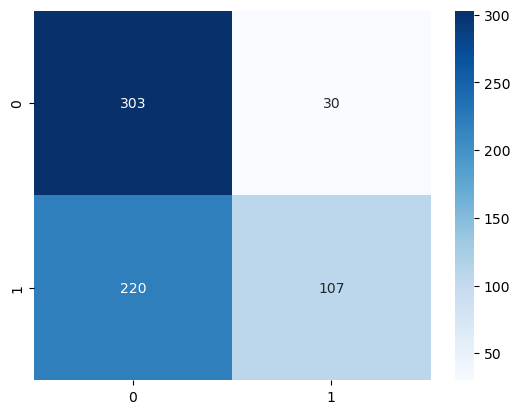

Polynomial
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92       333
         1.0       0.98      0.84      0.90       327

    accuracy                           0.91       660
   macro avg       0.92      0.91      0.91       660
weighted avg       0.92      0.91      0.91       660



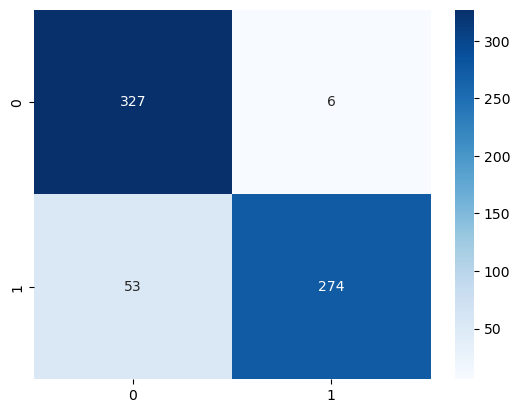

Sigmoid
              precision    recall  f1-score   support

         0.0       0.44      0.42      0.43       333
         1.0       0.44      0.46      0.45       327

    accuracy                           0.44       660
   macro avg       0.44      0.44      0.44       660
weighted avg       0.44      0.44      0.44       660



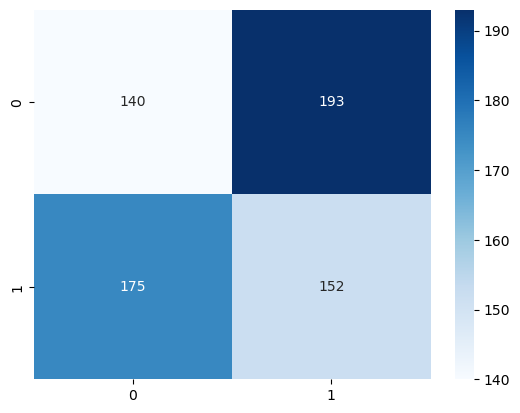

RBF
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       333
         1.0       0.98      0.98      0.98       327

    accuracy                           0.98       660
   macro avg       0.98      0.98      0.98       660
weighted avg       0.98      0.98      0.98       660



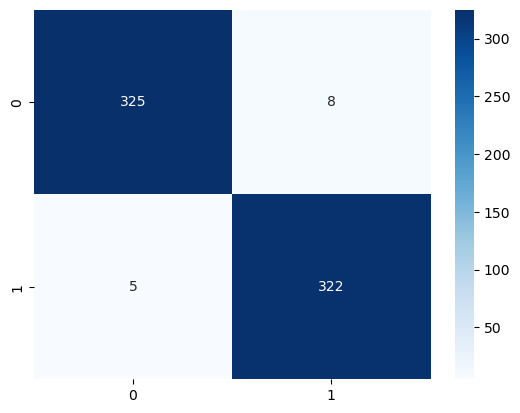

In [39]:
#Change of notation
y_real = y_test

print("Linear")
#Showing performance with a confusion matrix
confusion_matrix_custom(y_real,y_pred_linear)

#Showing performance with metrics
print(classification_report(y_real , y_pred_linear))
plt.show()

print("Polynomial")
#Showing performance with a confusion matrix
confusion_matrix_custom(y_real,y_pred_poly)

#Showing performance with metrics
print(classification_report(y_real , y_pred_poly))
plt.show()

print("Sigmoid")
#Showing performance with a confusion matrix
confusion_matrix_custom(y_real,y_pred_sigmoid)

#Showing performance with metrics
print(classification_report(y_real , y_pred_sigmoid))
plt.show()

print("RBF")
#Showing performance with a confusion matrix
confusion_matrix_custom(y_real,y_pred_rbf)

#Showing performance with metrics
print(classification_report(y_real , y_pred_rbf))
plt.show()


**RBF Kernel has more accuracy!!!**

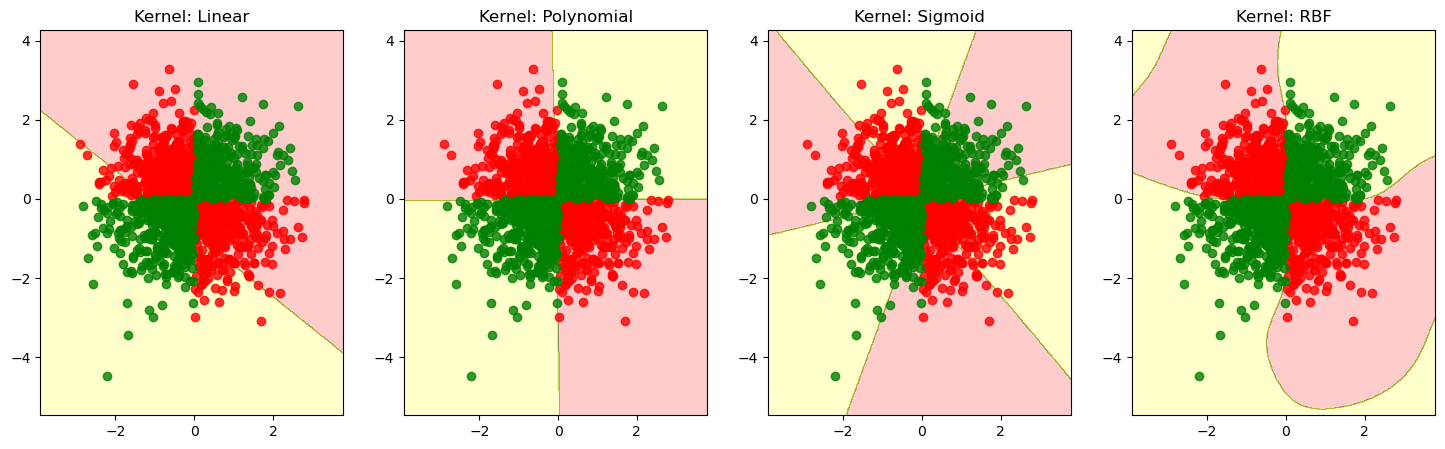

In [45]:
X_set, y_set = X_train, y_train

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.02),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.02))

model_dict = {"Linear": pipe_linear, "Polynomial": pipe_poly , "Sigmoid": pipe_sigmoid, "RBF": pipe_rbf}

plt.figure(figsize=(18, 5))
n_plot = 1

for kernel_name, kernel_model in model_dict.items():

    # Polynomial Plot
    plt.subplot(1, 4, n_plot)
    plt.contourf(X1, X2, kernel_model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.2, cmap = ListedColormap(('red', 'green','yellow')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    plt.title(f'Kernel: {kernel_name}')

    colorlist = ['red', 'green']
    for i in range(2):
        plt.scatter(X_set[y_set == i, 0], X_set[y_set == i, 1],
                    c=colorlist[i], label='Class' + str(i), alpha=0.8)
        
    n_plot += 1

plt.savefig("img/kernel_decision_boundaries.png", dpi = 300, bbox_inches='tight')   
plt.show()